In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import MiniBatchKMeans
import pickle

In [2]:
customer_data = pd.read_csv('../data/customer_data.csv')
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN
1,32,2,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN
2,34,4,Retail,Reference-Customer,Unknown,Married,Unknown,NaN,NaN
3,35,5,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN
4,42,7,Retail,Just Dial/Other helpline,Unknown,Unknown,Unknown,NaN,NaN


In [3]:
invoice_data = pd.read_csv('../data/invoice_data.csv')
invoice_data.head()

,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,...,Regn No,Service Advisor Name,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice Day,Invoice Month,Invoice Year,Day of the week
0,MAJIWADA,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,...,KA19MA1291,NaN,RUPESH,4051.95,4051.95,BC01FS1,2,1,2015,Friday
1,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,...,MH43R3046,NaN,PRASHANT,1001.29,1001.29,BC01SA2,3,1,2015,Saturday
2,THANE,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,...,AP09AX0582,NaN,IMRAN,233.14,233.14,BC01SA2,3,1,2015,Saturday
3,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,...,MH43R3046,NaN,PRASHANT,0.00,0.00,BC01SA2,3,1,2015,Saturday
4,THANE,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,...,MH04CD9768,NaN,DAYANAND,2747.12,2747.12,BC01SA2,3,1,2015,Saturday


In [25]:
#joining customer and invoice data
customer_invoice = customer_data.merge(invoice_data, on='Customer No.', how='left', sort=False)

In [43]:
customer_invoice.shape

(571416, 50)

In [44]:
#deriving new columns
customer_invoice['Has Insurance'] = customer_invoice['Claim No.'].notnull().astype(int)
customer_invoice['Is Dead'] = customer_invoice['Date of Birth'].notnull().astype(int)

In [45]:
drop_cols = ['Business Partner','Customer No.','Gate Pass Date','Gate Pass Time','Invoice Date',
            'Invoice No','Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time','ODN No.',
            'Pin code','Regn No','Service Advisor Name','Technician Name','User ID','Expiry Date','Plant',
            'Date of Birth','Death date','Claim No.','Policy no.']

In [46]:
customer_invoice.drop(drop_cols,1,inplace=True)

In [47]:
customer_invoice.columns

Index(['Partner Type', 'Data Origin', 'Title', 'Marital Status', 'Occupation',
       'Area / Locality', 'CITY', 'Cash /Cashless Type', 'Cust Type',
       'District', 'Insurance Company', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Total Amt Wtd Tax.',
       'Total Value', 'Invoice Day', 'Invoice Month', 'Invoice Year',
       'Day of the week', 'Has Insurance', 'Is Dead'],
      dtype='object')

In [48]:
categorical_cols = ['Partner Type','Data Origin','Title','Marital Status','Occupation','CITY','Cash /Cashless Type',
                   'Cust Type','District','Insurance Company','Make','Model','Order Type','Plant Name1','Day of the week',
                    'Area / Locality','Print Status']

In [49]:
customer_invoice_cat = customer_invoice[categorical_cols]

In [50]:
customer_invoice_cat = pd.get_dummies(customer_invoice_cat)

In [51]:
customer_invoice.drop(categorical_cols,1,inplace=True)

In [52]:
customer_invoice.columns

Index(['KMs Reading', 'Labour Total', 'Misc Total', 'OSL Total', 'Parts Total',
       'Recovrbl Exp', 'Total Amt Wtd Tax.', 'Total Value', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Has Insurance', 'Is Dead'],
      dtype='object')

In [53]:
customer_invoice = pd.concat([customer_invoice,customer_invoice_cat], axis=1)

In [54]:
customer_invoice.fillna(0, inplace=True)
customer_invoice.head()

,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Recovrbl Exp,Total Amt Wtd Tax.,Total Value,Invoice Day,Invoice Month,...,"Area / Locality_SR NO 36, 5/6,",Area / Locality_X076,Area / Locality_X081,Area / Locality_X099,Area / Locality_X109,Area / Locality_X241,Area / Locality_X277,Area / Locality_X312,Print Status_NO,Print Status_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
cols = customer_invoice.columns
cols

Index(['KMs Reading', 'Labour Total', 'Misc Total', 'OSL Total', 'Parts Total',
       'Recovrbl Exp', 'Total Amt Wtd Tax.', 'Total Value', 'Invoice Day',
       'Invoice Month',
       ...
       'Area / Locality_SR NO 36, 5/6,', 'Area / Locality_X076',
       'Area / Locality_X081', 'Area / Locality_X099', 'Area / Locality_X109',
       'Area / Locality_X241', 'Area / Locality_X277', 'Area / Locality_X312',
       'Print Status_NO', 'Print Status_YES'],
      dtype='object', length=493)

In [57]:
#scaling features
numerical_cols = ['KMs Reading', 'Labour Total', 'Misc Total', 'OSL Total', 'Parts Total',
       'Recovrbl Exp', 'Total Amt Wtd Tax.', 'Total Value', 'Invoice Day',
       'Invoice Month', 'Invoice Year']

customer_invoice_normalised = (customer_invoice-customer_invoice.min())/(customer_invoice.max()-customer_invoice.min())

In [136]:
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 5, 
                      batch_size = 200, 
                      max_no_improvement = 10, verbose = 10)

mbk.partial_fit(customer_invoice)

MiniBatchKMeans(batch_size=200, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=10)

In [138]:
pickle.dump(mbk, open("minibatch_kmeans.pkl", "wb"))

In [139]:
pickled_mkb = pickle.load(open("minibatch_kmeans.pkl", "rb"))

In [140]:
pickled_mkb

MiniBatchKMeans(batch_size=200, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=10)

In [143]:
mbk.cluster_centers_

array([[-1.20298147e-01, -1.00793059e-01, -3.50731914e-02, ...,
         0.00000000e+00,  1.02653791e-03,  1.55700635e-04],
       [ 5.58122430e+00,  5.14770979e+00,  2.15190142e+00, ...,
         0.00000000e+00,  9.32564983e-01,  6.74350172e-02],
       [ 2.35436192e+00, -1.01705409e-01, -3.57699605e-02, ...,
         0.00000000e+00,  1.42857143e-01,  8.57142857e-01],
       [ 3.48538026e+00,  1.06968894e+01,  3.71601939e+00, ...,
         0.00000000e+00,  9.04062230e-01,  9.59377701e-02],
       [ 2.86555964e+00,  1.61251373e+00,  4.55303549e-01, ...,
         7.22961249e-05,  9.24378253e-01,  7.56217467e-02]])

In [145]:
predictions = mbk.predict(customer_invoice)

Computing label assignment and total inertia


In [146]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
mbk.inertia_

3421657.9303747285

In [64]:
file_name = "mbk_pickle_"+str(1)+".pkl"
file_name

'mbk_pickle_1.pkl'

In [32]:
customer_invoice_normalised['Customer No.'] = customer_invoice['Customer No.']

In [33]:
customer_invoice_normalised.to_csv('../data/customer_invoice_normalised_with_custId.csv', index=False)

In [4]:
customer_invoice_normalised = pd.read_csv('../data/customer_invoice_normalised.csv')
customer_invoice_normalised.head()

,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Recovrbl Exp,Total Amt Wtd Tax.,Total Value,Invoice Day,Invoice Month,...,"Area / Locality_SR NO 36, 5/6,",Area / Locality_X076,Area / Locality_X081,Area / Locality_X099,Area / Locality_X109,Area / Locality_X241,Area / Locality_X277,Area / Locality_X312,Print Status_NO,Print Status_YES
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sse={}
for k in range(1,10):
    print("Running iteration: "+str(k))
    mbk = MiniBatchKMeans(init ='k-means++', n_clusters = k,
                      batch_size = 50, 
                      max_no_improvement = 10, verbose = 10)
        
    mbk.partial_fit(customer_invoice_normalised)
    file_name = "../pickles/mbk_pickle_"+str(k)+".pkl"
    pickle.dump(mbk, open(file_name, "wb"))
        
    print("Intertia: "+str(mbk.inertia_))
    sse[k] = mbk.inertia_

Running iteration: 1
Intertia: 926164.606494266
Running iteration: 2
Intertia: 916994.245274871
Running iteration: 3
Intertia: 757636.8234133313
Running iteration: 4
Intertia: 593216.3268717532
Running iteration: 5
Intertia: 558285.8236555634
Running iteration: 6
Intertia: 601952.7669799296
Running iteration: 7
Intertia: 471674.46864603687
Running iteration: 8
Intertia: 489275.07240358845
Running iteration: 9
Intertia: 484235.6538703332


In [17]:
plt.rcParams.update({'font.size': 15})

In [16]:
sse

{1: 926164.606494266,
 2: 916994.245274871,
 3: 757636.8234133313,
 4: 593216.3268717532,
 5: 558285.8236555634,
 6: 601952.7669799296,
 7: 471674.46864603687,
 8: 489275.07240358845,
 9: 484235.6538703332}

([<matplotlib.axis.XTick at 0xf82359160>,
 <a list of 9 Text xticklabel objects>)

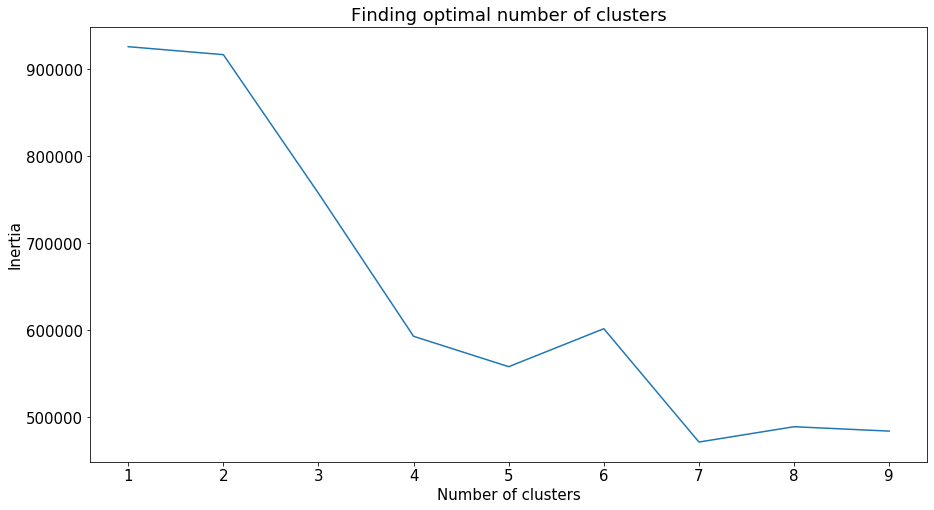

In [19]:
plt.figure(figsize=(15,8))
plt.title('Finding optimal number of clusters')
plt.plot(range(len(sse)), list(sse.values()))
plt.xlabel ('Number of clusters')
plt.ylabel ('Inertia')
plt.xticks(range(len(sse)), list(sse.keys()))

In [20]:
pickled_mkb = pickle.load(open("../pickles/mbk_pickle_4.pkl", "rb"))

In [23]:
clusters = pickled_mkb.predict(customer_invoice_normalised)

Computing label assignment and total inertia


In [27]:
customer_cluster = pd.DataFrame({'Customer No.': customer_invoice['Customer No.'], 'cluster': clusters})

In [34]:
customer_cluster.to_csv('../data/customer_cluster.csv', index=False)

In [65]:
sse_prev={1: 7177920.252196295, 2: 4780746.489037256, 3: 5886365.138706738, 4:3767080.881034182, 5: 3421657.9303747285,
    6: 3549981.9913420887, 7: 3009440.7854810823, 8: 2795710.611106249, 9: 2650373.689629377}

In [ ]:
clusters = list(sse.keys())           
inertia = list(sse.values())        
ax.plot_date(dates, prices, '-') 